In [1]:
!mkdir -p ~/.kaggle
!cp kaggle-2.json ~/.kaggle/

cp: cannot stat 'kaggle-2.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 310MB/s]
100% 1.06G/1.06G [00:11<00:00, 98.3MB/s]


In [3]:
import zipfile
zip_file=zipfile.ZipFile('dogs-vs-cats.zip')
zip_file.extractall('/content')
zip_file.close()


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image



In [5]:
train_path='dogs_vs_cats/train'
test_path='/content/dogs_vs_cats/test'

In [6]:
img_in_class=os.listdir(train_path)
img_in_class

['cats', 'dogs']

In [7]:
def get_images_from_directory(directory,classes):
  plt.figure(figsize=(12,5))
  for i,class_name in enumerate(classes):
    class_path=os.path.join(directory,class_name)

    class_img=os.listdir(class_path)
    img_path=os.path.join(class_path,class_img[0])
    img=Image.open(img_path)

    plt.subplot(1,len(classes),i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')



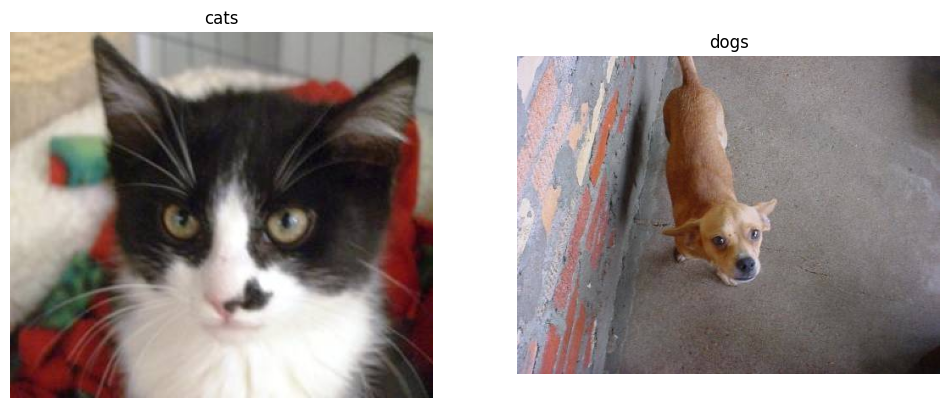

In [8]:
get_images_from_directory(train_path,img_in_class)

In [9]:
train_df = keras.utils.image_dataset_from_directory(
    directory = train_path,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

valid_df = keras.utils.image_dataset_from_directory(
    directory = test_path,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_df = train_df.map(process)
valid_df = valid_df.map(process)

In [11]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam' ,loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_df,epochs=10,validation_data=valid_df)

Epoch 1/10
625/625 [==============================] - 78s 108ms/step - loss: 1.2349 - accuracy: 0.6028 - val_loss: 0.6126 - val_accuracy: 0.6620
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5403 - accuracy: 0.7254 - val_loss: 0.6743 - val_accuracy: 0.6944
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4579 - accuracy: 0.7860 - val_loss: 0.6369 - val_accuracy: 0.6904
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4108 - accuracy: 0.8125 - val_loss: 0.5247 - val_accuracy: 0.7772
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3366 - accuracy: 0.8521 - val_loss: 0.4436 - val_accuracy: 0.7918
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2687 - accuracy: 0.8839 - val_loss: 0.5471 - val_accuracy: 0.7978
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2004 - accuracy: 0.9193 - val_loss: 0.5622 - val_ac

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

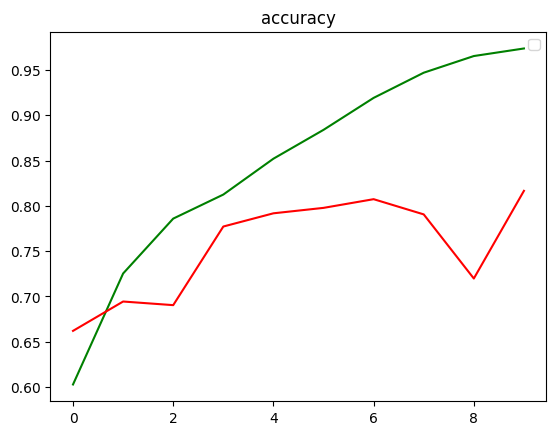

In [16]:
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_accuracy'],color='red')
plt.title('accuracy')
plt.legend()
plt.show()

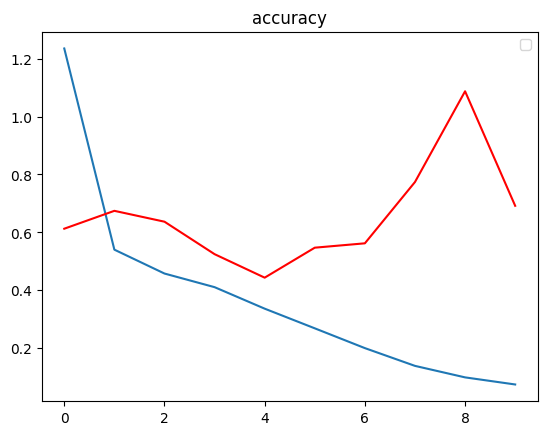

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('accuracy')
plt.legend()
plt.show()

In [18]:
model.save('catvsdog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
!pip install Flask tensorflow



In [27]:
!pip install gradio


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━

In [31]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model('catvsdog.h5')

def model_predict(img):
    img = img.resize((256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    print(f'Raw model prediction: {prediction}')
    return 'Dog' if prediction[0][0] > 0.5 else 'Cat'

interface = gr.Interface(
    fn=model_predict,
    inputs=gr.Image(type="pil"),
    outputs=gr.Textbox(label="Prediction"),
    title="Cat vs Dog Classifier",
    description="Upload an image to classify it as a cat or a dog."
)

if __name__ == "__main__":
    interface.launch()



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e2c3082e59058a15be.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
